In [1]:
import tensorflow as tf

2023-08-04 19:16:50.089197: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-04 19:16:50.183623: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 19:16:52.372455: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 19:16:52.418269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 19:17:08.702674: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
X = tf.range(20)
X

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)>

In [3]:
dataset = tf.data.Dataset.from_tensor_slices(X)

In [4]:
for i in dataset:
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)


In [6]:
dataset = dataset.repeat(3).batch(7)

In [7]:
for i in dataset:
    print(i)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int32)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int32)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int32)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int32)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int32)


In [8]:
dataset = dataset.map(lambda x: x * 2) 

In [11]:
list(dataset.take(1).as_numpy_iterator())

[array([ 0,  2,  4,  6,  8, 10, 12], dtype=int32)]

In [12]:
dataset = dataset.shuffle(buffer_size=5, seed=42).batch(7)

# reading input files

In [13]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [14]:
images, labels = train

In [16]:
images[0].max()

255

In [45]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))

In [46]:
i = list(dataset.take(1).as_numpy_iterator())
i[0][0].max()

255

In [48]:
dataset_2 = dataset.map(
    lambda x, y: (x/255, y)
)

In [49]:
i = list(dataset_2.take(1).as_numpy_iterator())
i[0][0].max()

1.0

In [ ]:
dataset = dataset.shuffle(20)

In [56]:
def gen_test():
  for i in range(100):
    yield i

In [61]:
dataset = tf.data.Dataset.from_generator(gen_test, output_types=tf.int32, output_shapes = ())

In [64]:
dataset = dataset.repeat().batch(10)

In [66]:
for i in dataset.take(2):
    print(i)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor([10 11 12 13 14 15 16 17 18 19], shape=(10,), dtype=int32)


## Loading image from dir

In [67]:
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

228813984/228813984 [==============================] - 109s 0us/step


In [69]:
flowers

'/root/.keras/datasets/flower_photos'

In [68]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [70]:
img_dataset = img_gen.flow_from_directory(flowers)

Found 3670 images belonging to 5 classes.


In [75]:
images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [76]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)


In [72]:
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers), 
    output_types=(tf.float32, tf.float32), 
    output_shapes=([32,256,256,3], [32,5])
)

ds.element_spec

(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

In [73]:
for images, labels in ds.take(1):
  print('images.shape: ', images.shape)
  print('labels.shape: ', labels.shape)


Found 3670 images belonging to 5 classes.
images.shape:  (32, 256, 256, 3)
labels.shape:  (32, 5)


In [74]:
from matplotlib import pyplot as plt

In [88]:
i = list(ds.take(1).as_numpy_iterator())[0][0]

Found 3670 images belonging to 5 classes.


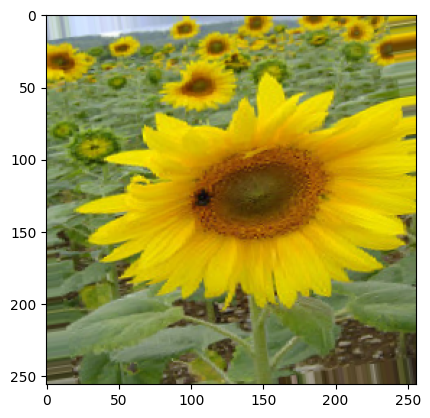

In [94]:
plt.imshow(i[9])